# Practice Lab: Linear Regression


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.nn import Linear


def load_data():
    data = torch.from_numpy(np.loadtxt("data/ex1data1.txt", delimiter=","))
    X = data[:, :1]
    y = data[:, 1:]
    return X, y

## Load Data


In [2]:
# load the dataset
x_train, y_train = load_data()

# print x_train
print("Type of x_train:", type(x_train))
print("First five elements of x_train are:\n", x_train[:5], end="\n\n")

# print y_train
print("Type of y_train:", type(y_train))
print("First five elements of y_train are:\n", y_train[:5], end="\n\n")

print("The shape of x_train is:", x_train.shape)
print("The shape of y_train is: ", y_train.shape)
print("Number of training examples (m):", len(x_train))

Type of x_train: <class 'torch.Tensor'>
First five elements of x_train are:
 tensor([[6.1101],
        [5.5277],
        [8.5186],
        [7.0032],
        [5.8598]], dtype=torch.float64)

Type of y_train: <class 'torch.Tensor'>
First five elements of y_train are:
 tensor([[17.5920],
        [ 9.1302],
        [13.6620],
        [11.8540],
        [ 6.8233]], dtype=torch.float64)

The shape of x_train is: torch.Size([97, 1])
The shape of y_train is:  torch.Size([97, 1])
Number of training examples (m): 97


## Visualize Data


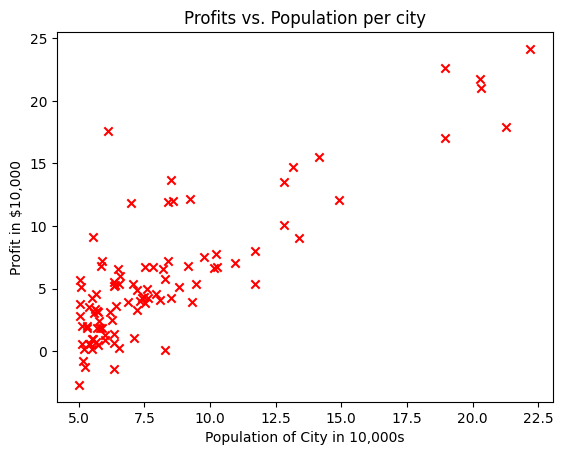

In [3]:
# Create a scatter plot of the data. To change the markers to red "x",
# we used the 'marker' and 'c' parameters
plt.scatter(x_train, y_train, marker="x", c="r")

# Set the title
plt.title("Profits vs. Population per city")
# Set the y-axis label
plt.ylabel("Profit in $10,000")
# Set the x-axis label
plt.xlabel("Population of City in 10,000s")
plt.show()

## Train model


In [4]:
learning_rate = 0.01  # alpha
epochs = 1500  # iterations

model = Linear(x_train.shape[1], 1, dtype=x_train.dtype)

cost = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(x_train)
    loss = cost(outputs, y_train)

    loss.backward()

    optimizer.step()

    print("epoch {}, loss {}".format(epoch, loss.item()))

epoch 0, loss 13.601617051014436
epoch 1, loss 12.726573297451852
epoch 2, loss 12.349867823216835
epoch 3, loss 12.180240743939974
epoch 4, loss 12.096717656102385
epoch 5, loss 12.049051606330345
epoch 6, loss 12.016372031211061
epoch 7, loss 11.990009747217787
epoch 8, loss 11.966363373708313
epoch 9, loss 11.943936428043886
epoch 10, loss 11.922106693961336
epoch 11, loss 11.900615083239778
epoch 12, loss 11.879353336248654
epoch 13, loss 11.858275844121057
epoch 14, loss 11.837363024385697
epoch 15, loss 11.81660610913763
epoch 16, loss 11.796000826828092
epoch 17, loss 11.775544777986381
epoch 18, loss 11.755236345203015
epoch 19, loss 11.735074240362874
epoch 20, loss 11.715057316558006
epoch 21, loss 11.695184489934372
epoch 22, loss 11.67545470719946
epoch 23, loss 11.655866932095293
epoch 24, loss 11.636420139748703
epoch 25, loss 11.617113314293803
epoch 26, loss 11.59794544785365
epoch 27, loss 11.578915540086728
epoch 28, loss 11.560022597968205
epoch 29, loss 11.541265635

In [5]:
w = model.weight[0][0].item()
b = model.bias[0].item()
print("w,b found by gradient descent:", w, b)

w,b found by gradient descent: 1.1911674182858438 -3.877204229170904


## Plot predictions


Text(0.5, 0, 'Population of City in 10,000s')

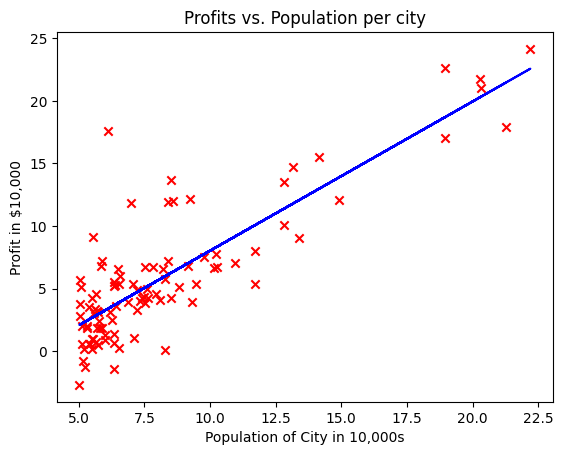

In [6]:
predicted = model(x_train)
predicted = predicted.detach()

# Plot the linear fit
plt.plot(x_train, predicted, c="b")

# Create a scatter plot of the data.
plt.scatter(x_train, y_train, marker="x", c="r")

# Set the title
plt.title("Profits vs. Population per city")
# Set the y-axis label
plt.ylabel("Profit in $10,000")
# Set the x-axis label
plt.xlabel("Population of City in 10,000s")